In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('Car Sale.csv')

In [7]:
df["Date"] = pd.to_datetime(df["Date"])

In [8]:
df["day"] = df["Date"].dt.day
df["month"] = df["Date"].dt.month
df["year"] = df["Date"].dt.year

In [9]:
df.drop("Date", inplace = True, axis = 1)

In [10]:
df

,Car_id,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,day,month,year
0,C_CND_000001,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown,2,1,2022
1,C_CND_000002,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora,2,1,2022
2,C_CND_000003,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville,2,1,2022
3,C_CND_000004,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco,2,1,2022
4,C_CND_000005,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville,2,1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco,31,12,2023
23902,C_CND_023903,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown,31,12,2023
23903,C_CND_023904,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale,31,12,2023
23904,C_CND_023905,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin,31,12,2023


The Average_price of each dealer is Dealer_Name
Buddy Storbeck's Diesel Service Inc                27217.261563
C & M Motors Inc                                   28111.755200
Capitol KIA                                        28189.703822
Chrysler Plymouth                                  27555.526400
Chrysler of Tri-Cities                             28123.091054
Classic Chevy                                      28602.014446
Clay Johnson Auto Sales                            27816.027113
Diehl Motor CO Inc                                 27993.929487
Enterprise Rent A Car                              28312.580800
Gartner Buick Hyundai Saab                         28247.621019
Hatfield Volkswagen                                27853.712242
Iceberg Rentals                                    28522.958533
McKinney Dodge Chrysler Jeep                       27684.096979
Motor Vehicle Branch Office                        27956.739617
Nebo Chevrolet                                     27818

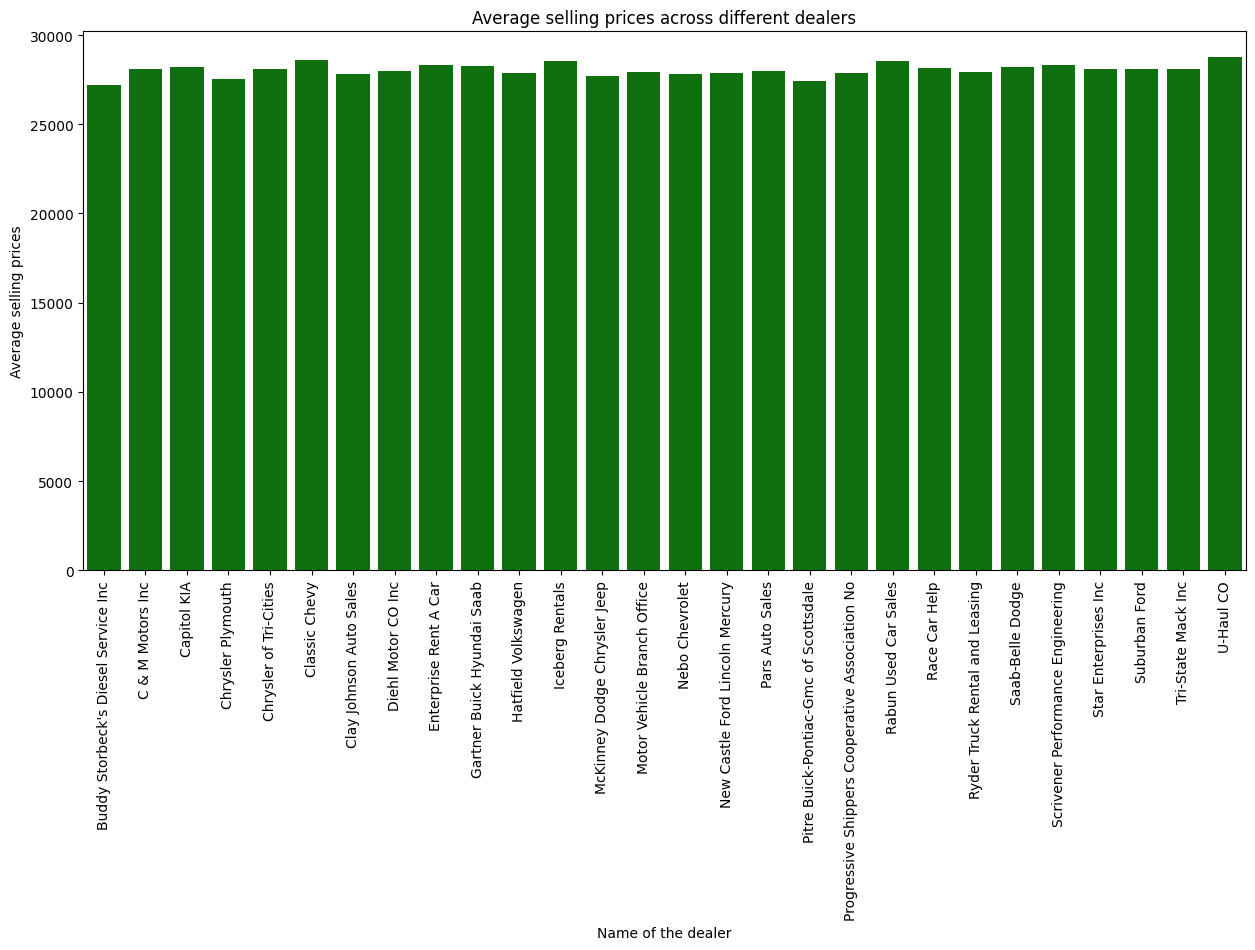

In [11]:
#1. What is the average selling price of cars for each dealer, and how does it compare across different dealers ?

Average_price = df.groupby("Dealer_Name")['Price ($)'].mean()
print(f"The Average_price of each dealer is {Average_price}")

# Compare the average selling prices across different dealers

plt.figure(figsize =(15,7))
sns.barplot(Average_price, color='g')
plt.title("Average selling prices across different dealers")
plt.ylabel("Average selling prices")
plt.xlabel("Name of the dealer")
plt.xticks(rotation = 90)
plt.show()

# Insight >> Approximately the average selling price of each dealer is same.

In [12]:
df.columns

Index(['Car_id', 'Customer Name', 'Gender', 'Annual Income', 'Dealer_Name',
       'Company', 'Model', 'Engine', 'Transmission', 'Color', 'Price ($)',
       'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region', 'day', 'month',
       'year'],
      dtype='object')

In [13]:
#2 Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends ?

# Calculate the variance
price_variance = df.groupby("Company")["Price ($)"].var()

# find the brand with the highest variation in prices
highest_variation_brand = price_variance .idxmax()
highest_variation_value = price_variance.max()

print(f"The car brand with the highest variation in prices is {highest_variation_brand} with a standard deviation of {highest_variation_value}")

The car brand with the highest variation in prices is Lincoln with a standard deviation of 386438938.10863817


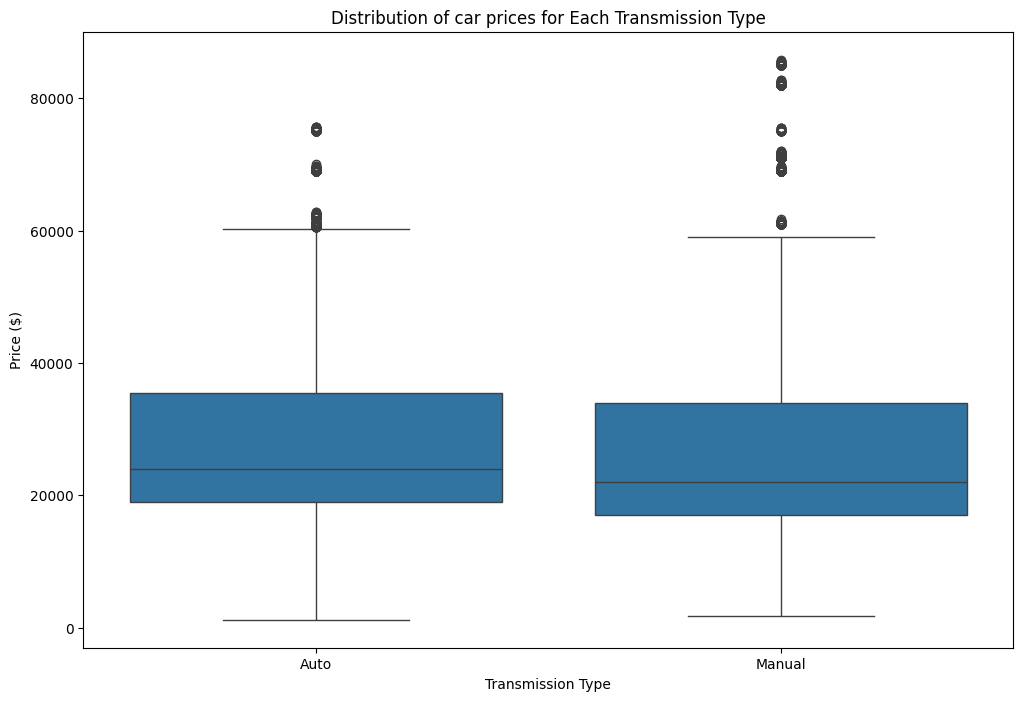

                 0.25     0.75
Transmission                  
Auto          19000.0  35500.0
Manual        17000.0  34000.0
                  IQR
Transmission         
Auto          16500.0
Manual        17000.0


In [14]:
#3 What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare ?


plt.figure(figsize = (12,8))
sns.boxplot(data = df,x = "Transmission", y = 'Price ($)')
plt.title("Distribution of car prices for Each Transmission Type")
plt.xlabel("Transmission Type")
plt.ylabel("Price ($)")
plt.show()


quartiles = df.groupby("Transmission")["Price ($)"].quantile([0.25, 0.75]).unstack()
print(quartiles)
quartiles["IQR"] = quartiles[0.75] - quartiles[0.25]
print(quartiles[["IQR"]])

#Insight >> Too many outliers are present on the prices

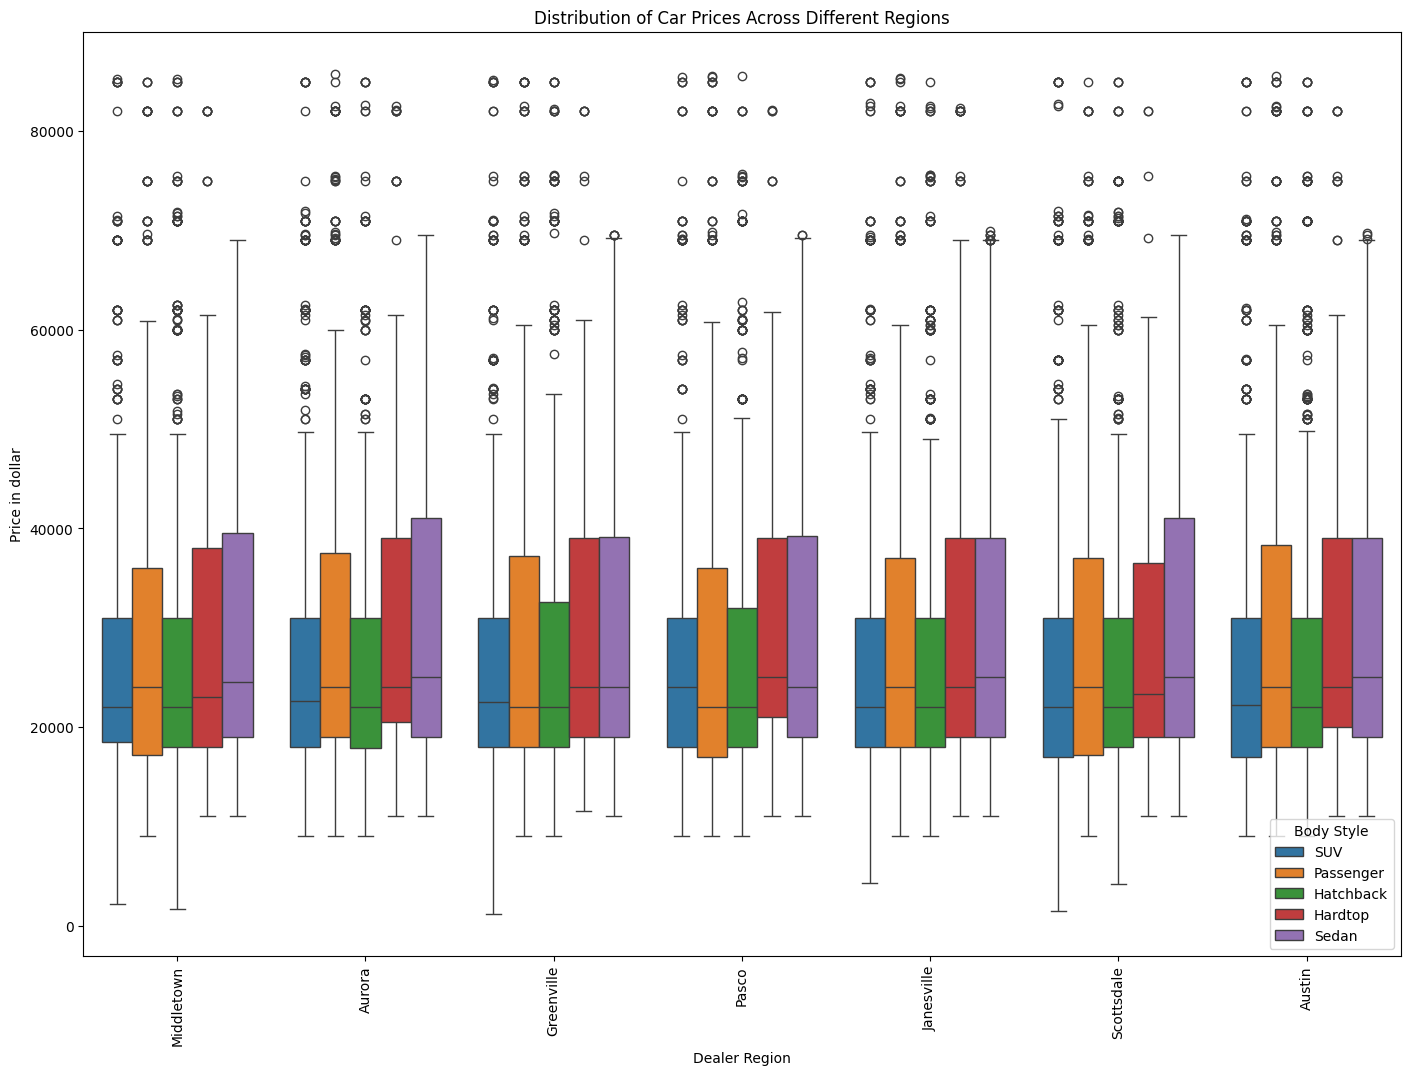

In [15]:
#4 What is the distribution of car prices across different regions ?
plt.figure(figsize = (17,12))
sns.boxplot(x = 'Dealer_Region', y = 'Price ($)', data = df, hue = "Body Style")
plt.title("Distribution of Car Prices Across Different Regions")
plt.xlabel("Dealer Region")
plt.ylabel("Price in dollar")
plt.xticks(rotation = 90)
plt.show()

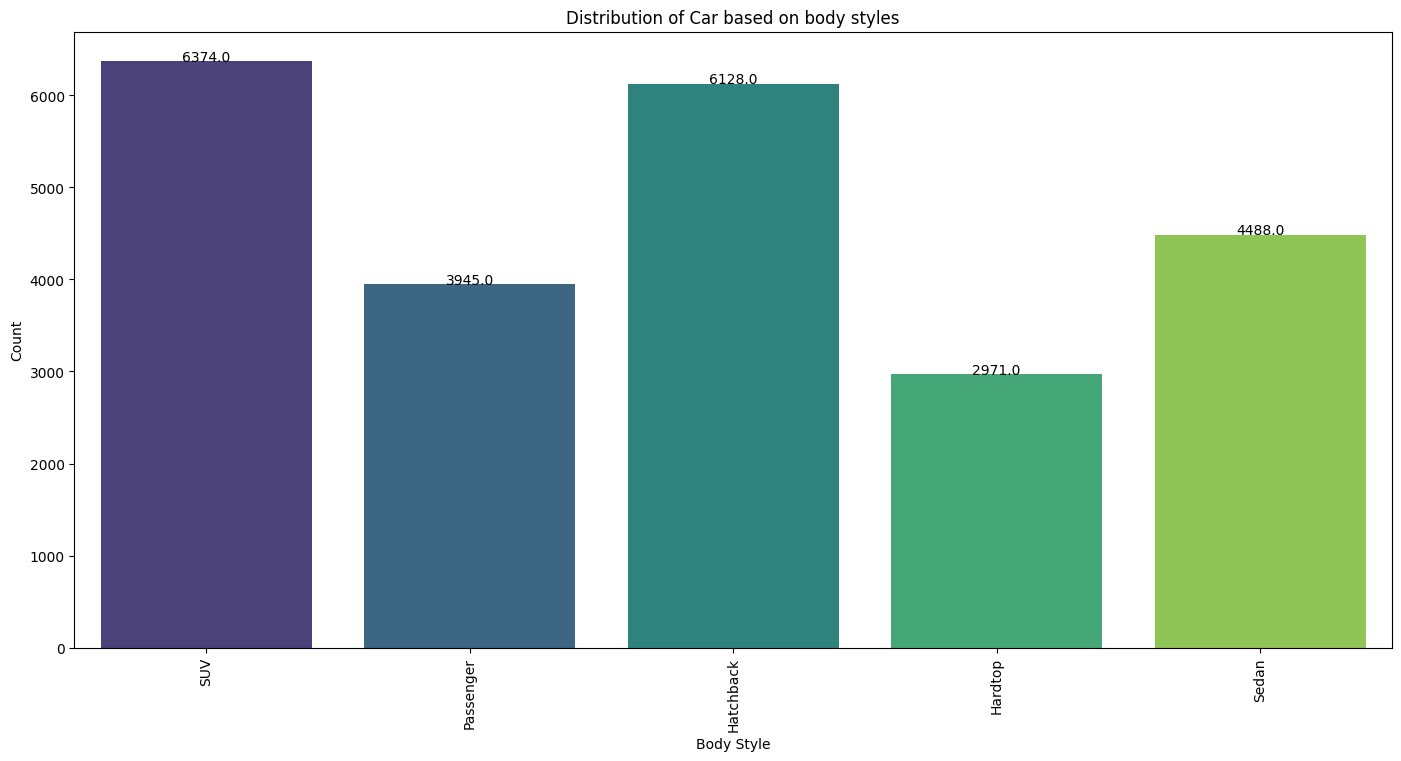

In [16]:
#5 What is the distribution of car based on body styles ?

plt.figure(figsize = (17,8))
sns.countplot(x = 'Body Style', data = df, palette = "viridis")
plt.title("Distribution of Car based on body styles")
plt.xlabel("Body Style")
plt.ylabel("Count")
plt.xticks(rotation = 90)


# insight >> The most sold car are SUV and after that Hatchback
# Add count labels on the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
plt.show()

In [17]:
#6. How does the average selling price of cars vary by customer gender and annual income ?
df['Annual Income']
df["Gender"].unique()

male_gender = df['Gender'] == 'Male'

# Average selling price of car by gender
avg_price_by_gender = df.groupby("Gender")["Price ($)"].mean()

# Average selling price of car by annual income
avg_income_by_gender =  df.groupby("Gender")['Annual Income'].mean()

result = pd.DataFrame({"Average Price" : avg_price_by_gender,
                       'Average Annual Income' : avg_income_by_gender
    
})
print(result)

# Insight >> Mostly the average selling price of car and average annual income of each gender are same  

        Average Price  Average Annual Income
Gender                                      
Female   28277.265270          755973.021339
Male     28039.429407          851184.044207


               Price ($)
Dealer_Region           
Aurora             85800
Austin             85601
Greenville         85200
Janesville         85400
Middletown         85300
Pasco              85600
Scottsdale         85001


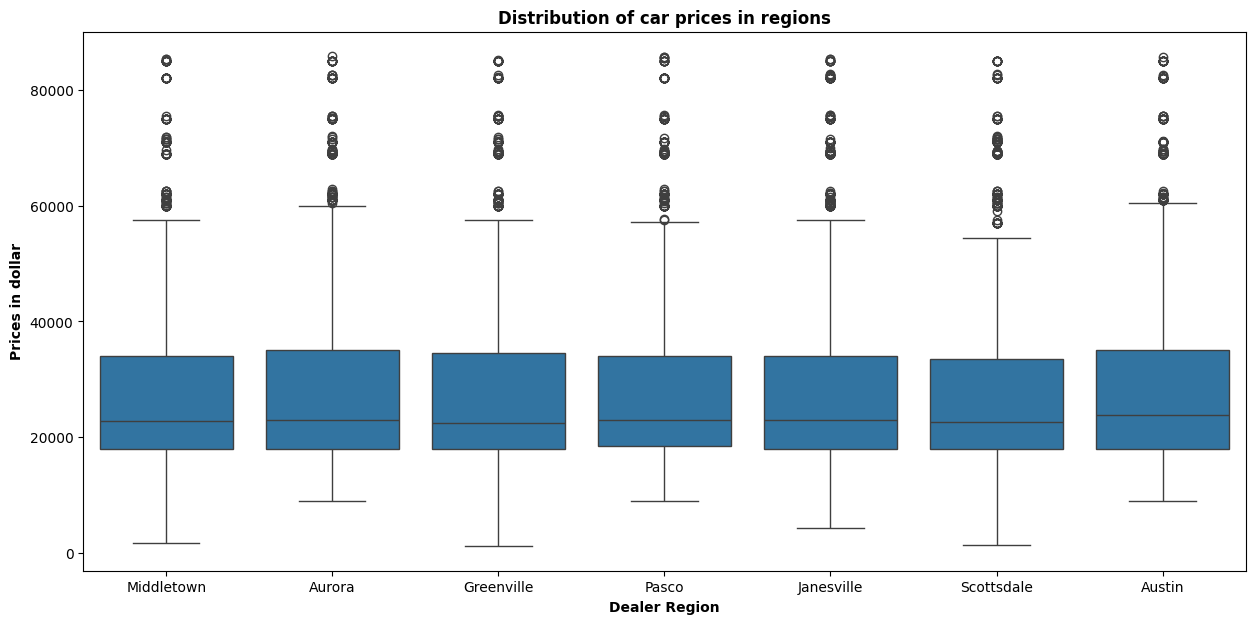

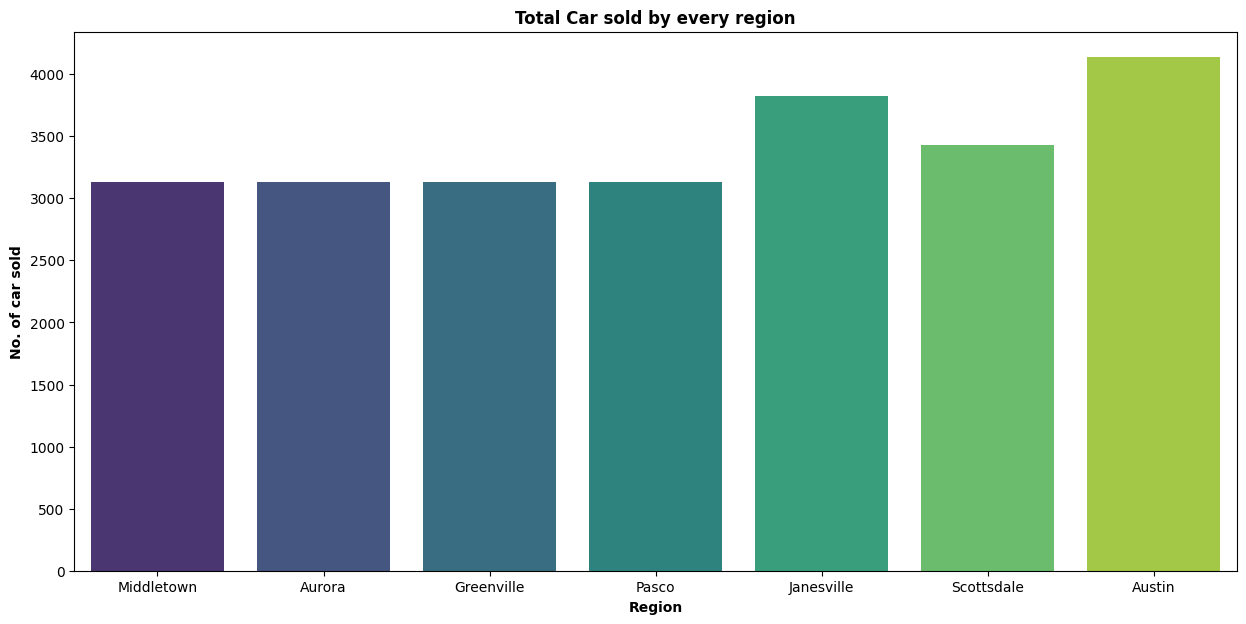

In [18]:
#7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?

# maximum car price of every region

print(df.groupby('Dealer_Region').agg({'Price ($)' : 'max'}))

# Distribution of car prices of every region
plt.figure(figsize = (15,7))
sns.boxplot(x = 'Dealer_Region', y = 'Price ($)', data = df)
plt.title("Distribution of car prices in regions", fontweight = 'bold')
plt.xlabel("Dealer Region", fontweight = 'bold')
plt.ylabel("Prices in dollar", fontweight = 'bold')
plt.show()
# Insight >> The costly car are purchase in Aurora and Austin region

# No. of cars sold by every region 
plt.figure(figsize = (15,7))
plt.title("Total Car sold by every region",fontweight = 'bold')
plt.xlabel("Region",fontweight = 'bold')
plt.ylabel("No. of car sold", fontweight = 'bold')
sns.countplot(x = 'Dealer_Region', data = df, palette = "viridis")
plt.show()


In [19]:
#8. How does the average car price differ between cars with different engine sizes?

# Perform the groupby operation
avg_price_by_engine = df.groupby(['Company','Engine'])['Price ($)'].mean().unstack()

# Replace Nan to other value
avg_price_by_engine_filled = avg_price_by_engine.fillna("Not made")

# Result
print((avg_price_by_engine_filled))

Engine     DoubleÂ Overhead Camshaft  Overhead Camshaft
Company                                                
Acura                   28476.150171       22007.921717
Audi                    25969.457317       21169.891447
BMW                     24910.515284       25339.084337
Buick                   35176.835088       30779.785714
Cadillac                43568.836461       37500.462366
Chevrolet               26062.721503       26298.800382
Chrysler                 25365.02807       28131.222642
Dodge                   29292.840649       21550.720706
Ford                      31877.6173       26920.048179
Honda                   22377.171598       33295.272973
Hyundai                     Not made       19386.234848
Infiniti                33704.484375       20938.298507
Jaguar                  19961.078431       27184.961240
Jeep                    23746.005525       18383.445055
Lexus                   25277.106157       46471.861027
Lincoln                 20852.111801       36541

In [26]:
df['Annual Income']

0          13500
1        1480000
2        1035000
3          13500
4        1465000
          ...   
23901      13500
23902     900000
23903     705000
23904      13500
23905    1225000
Name: Annual Income, Length: 23906, dtype: int64

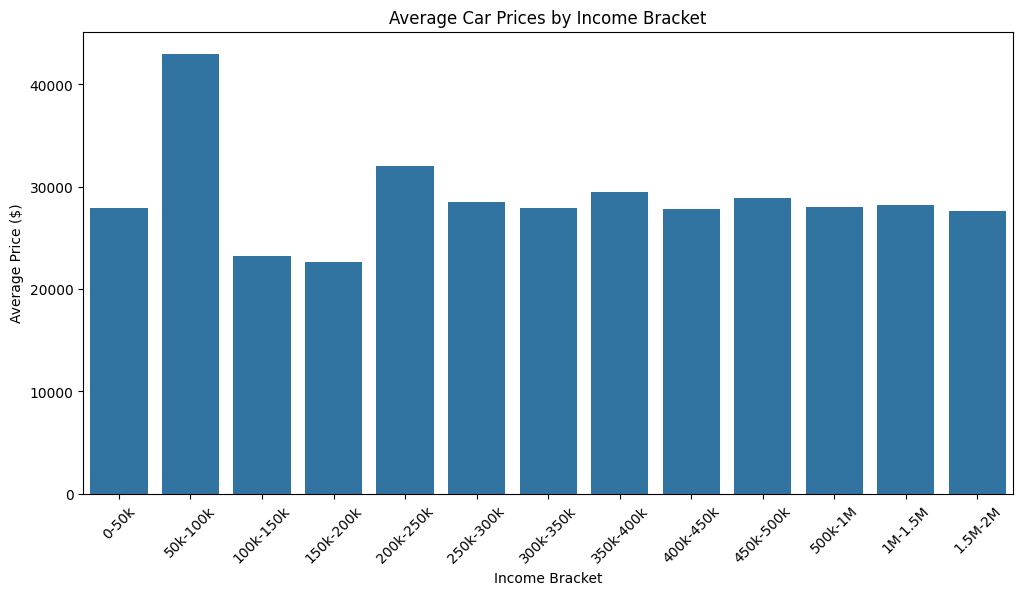

In [23]:
#9 How do car prices vary based on the customer’s annual income bracket ?

df['Income Bracket'] = pd.cut(df['Annual Income'], bins=[0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 1000000, 1500000, 2000000], labels=['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k-250k', '250k-300k', '300k-350k', '350k-400k', '400k-450k', '450k-500k', '500k-1M', '1M-1.5M', '1.5M-2M'])
avg_prices = df.groupby('Income Bracket')['Price ($)'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Income Bracket', y='Price ($)', data=avg_prices)
plt.xticks(rotation=45) 
plt.title('Average Car Prices by Income Bracket') 
plt.xlabel('Income Bracket')
plt.ylabel('Average Price ($)') 
plt.show()

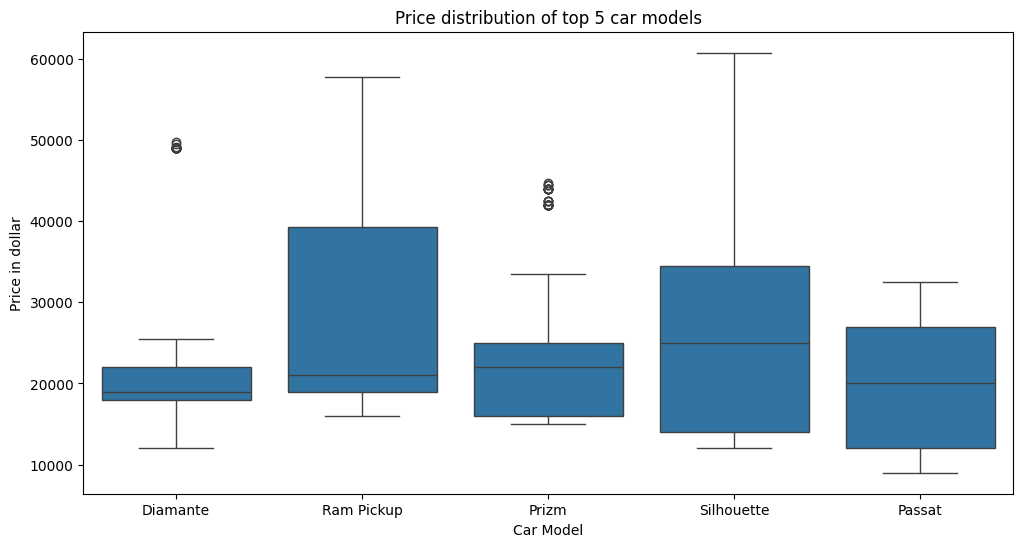

In [21]:
#10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?

# Top 5 models of highest sales
top_models = df["Model"].value_counts().head(5)

# Filter the data frame to include only the top 5 mof=dels,
top_models_list = top_models.index.tolist()
top_models_df = df[df['Model'].isin(top_models_list)]

plt.figure(figsize = (12, 6))
sns.boxplot(x = "Model", y = 'Price ($)', data = top_models_df)
plt.title("Price distribution of top 5 car models")
plt.xlabel("Car Model")
plt.ylabel("Price in dollar")
plt.show()

In [92]:
df.columns

Index(['Car_id', 'Customer Name', 'Gender', 'Annual Income', 'Dealer_Name',
       'Company', 'Model', 'Engine', 'Transmission', 'Color', 'Price ($)',
       'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region', 'day', 'month',
       'year'],
      dtype='object')

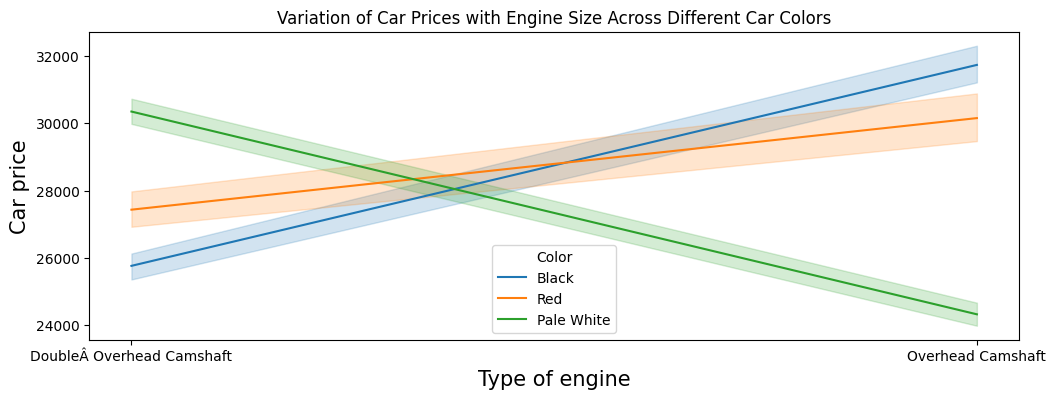

In [93]:
#11.How does car price vary with engine size across different car colors, and which colors have the highest price variation?

# variation of car pricees with engine size
plt.figure(figsize = (12,4))
sns.lineplot(x = "Engine", y = "Price ($)",hue = "Color", data = df)
plt.title("Variation of Car Prices with Engine Size Across Different Car Colors")
plt.ylabel("Car price", fontsize = 15)
plt.xlabel("Type of engine", fontsize = 15)
plt.show()

# Insight >> The price of the black car with Overhead Camshaft engine is more as compared to red and pale white and the price of Double overhead camshaft 
# is more in Pale white 

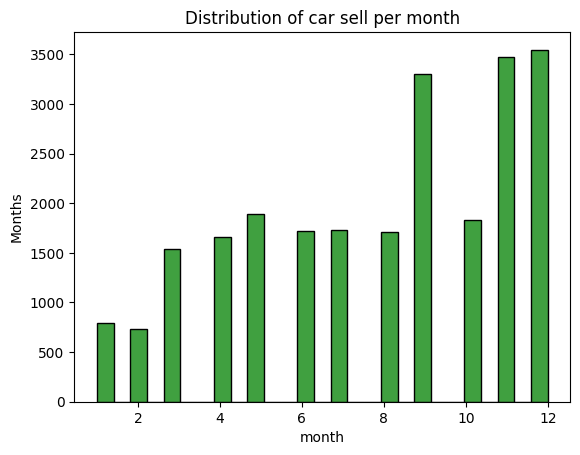

In [94]:
#12 Is there any seasonal trend in car sales based on the date of sale ?

sns.histplot(x = "month", data = df, color = 'green')
# Insight >> Most of the car sell in the December month 
plt.title("Distribution of car sell per month")
plt.ylabel("Months")
plt.show()

In [95]:
df.columns

Index(['Car_id', 'Customer Name', 'Gender', 'Annual Income', 'Dealer_Name',
       'Company', 'Model', 'Engine', 'Transmission', 'Color', 'Price ($)',
       'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region', 'day', 'month',
       'year'],
      dtype='object')

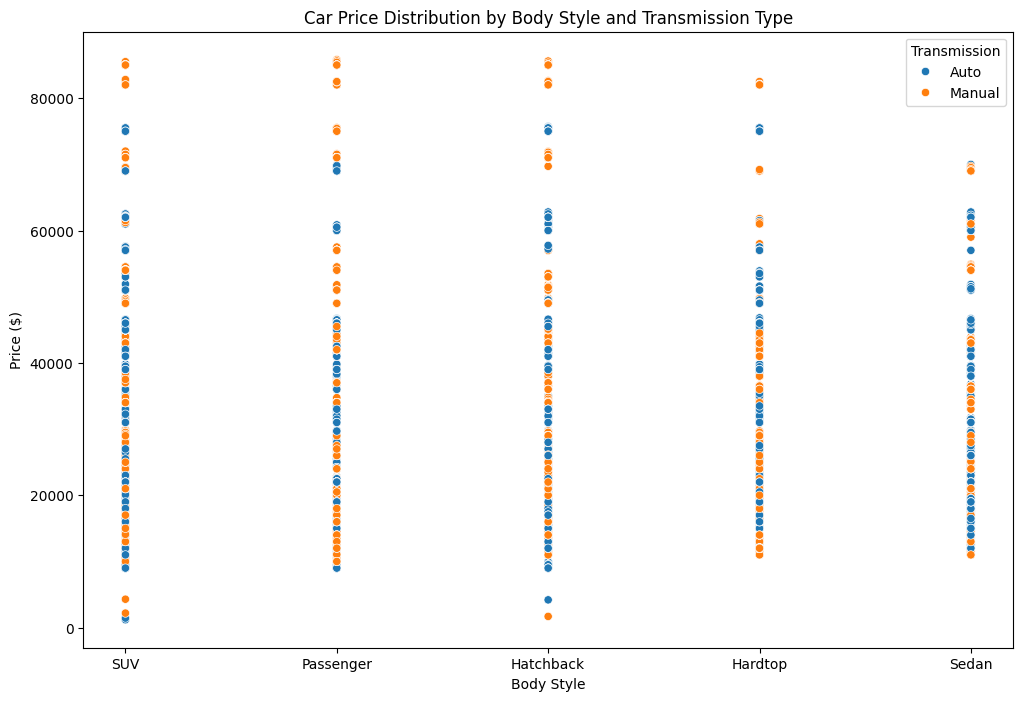

In [96]:
#13 How does the car price distribution change when considering different combinations of body style and transmission type ?

plt.figure(figsize = (12,8))
sns.scatterplot(y = "Price ($)", x = "Body Style", hue = "Transmission",data = df)
plt.title("Car Price Distribution by Body Style and Transmission Type")
plt.xlabel("Body Style")
plt.ylabel("Price ($)")
plt.show()

# Insight >> The price of the manual car is more as compared to the Auto type transmission car.
# The price of the SUV, Passenger and Hatchback style car is more than theHardtop and sedan.

The correlation between price and Annual Income
                Price ($)  Annual Income
Price ($)       1.000000       0.012065
Annual Income   0.012065       1.000000


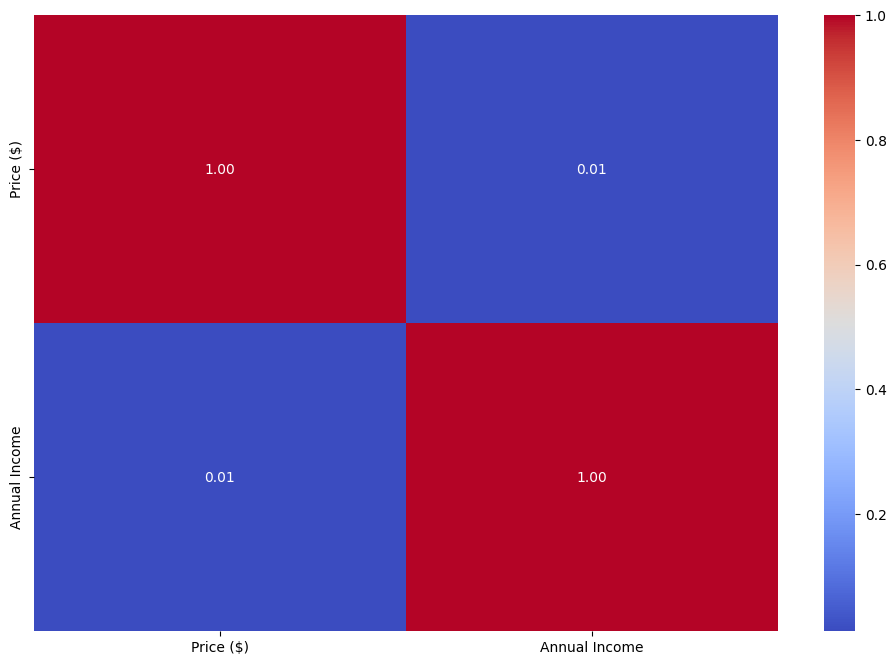

In [97]:
#14 What is the correlation between car price, engine size, and annual income of customers, and how do these features interact ?

correlation = df[["Price ($)","Annual Income"]].corr()
print("The correlation between price and Annual Income\n", correlation)
plt.figure(figsize = (12,8))
sns.heatmap(correlation,annot = True, cmap = "coolwarm", fmt = ".2f" )
plt.show()

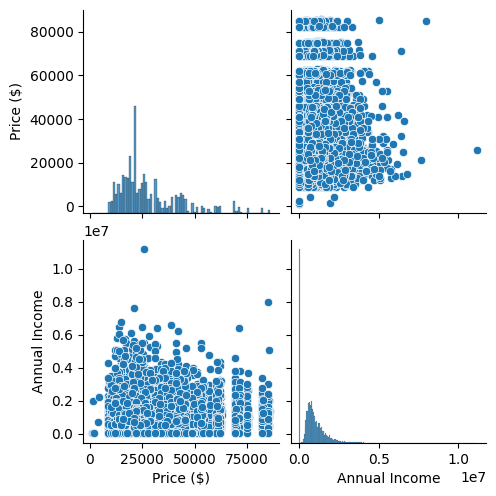

In [98]:
sns.pairplot(df[['Price ($)', 'Engine', 'Annual Income']])
plt.show()

In [100]:
#15 How does the average car price vary across different car models and engine types?

# VCariation of car Price 
df.groupby(["Model","Engine"])["Price ($)"].mean()

Model     Engine                   
3-Sep     DoubleÂ Overhead Camshaft    37986.380117
3000GT    DoubleÂ Overhead Camshaft    22764.326923
          Overhead Camshaft            21770.659864
300M      DoubleÂ Overhead Camshaft    21394.888889
323i      DoubleÂ Overhead Camshaft    16744.632287
                                           ...     
Windstar  Overhead Camshaft            17100.272727
Wrangler  DoubleÂ Overhead Camshaft    21145.294737
          Overhead Camshaft            18742.942029
Xterra    DoubleÂ Overhead Camshaft    15940.459459
          Overhead Camshaft            31072.500000
Name: Price ($), Length: 261, dtype: float64